In [1]:
%%capture
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

!mv -v cats_and_dogs_filtered/train/dogs/* cats_and_dogs_filtered/train/
!mv -v cats_and_dogs_filtered/train/cats/* cats_and_dogs_filtered/train/
!rm -rf cats_and_dogs_filtered/train/cats/
!rm -rf cats_and_dogs_filtered/train/dogs/

!mv -v cats_and_dogs_filtered/validation/dogs/* cats_and_dogs_filtered/validation/
!mv -v cats_and_dogs_filtered/validation/cats/* cats_and_dogs_filtered/validation/
!rm -rf cats_and_dogs_filtered/validation/cats/
!rm -rf cats_and_dogs_filtered/validation/dogs/

!mkdir best_models

In [ ]:
%load_ext autoreload
%autoreload 2

PATH_REPO_DRIVE = 'drive/MyDrive/colab/entretien/cat-vs-dog'

#--Colab--------
import os, sys
try:
    import google.colab
    IN_COLAB = True
    import os
except:
    IN_COLAB = False

if IN_COLAB and os.getcwd()=='/content':
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(PATH_REPO_DRIVE)
#---------------

In [3]:
from dataset.cat_dog_dataset import CatDogDataloader, plot_images
from utils.trainer import Trainer
from model.resnet import ResNet50
import matplotlib.pyplot as plt

import torch
from torch import nn

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [75]:
dataloader = CatDogDataloader(
    img_size=224,
    batch_size=16,
    dataset_root = 'cats_and_dogs_filtered'
)

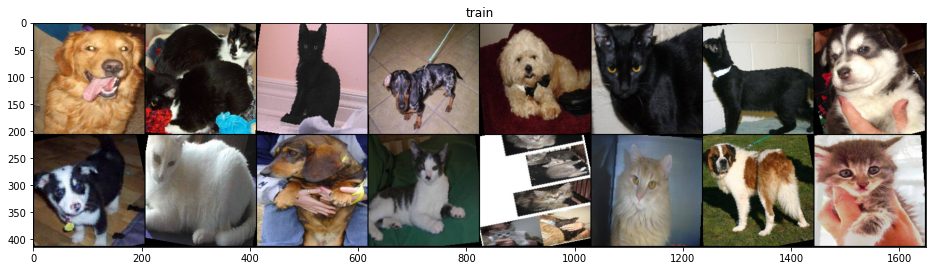

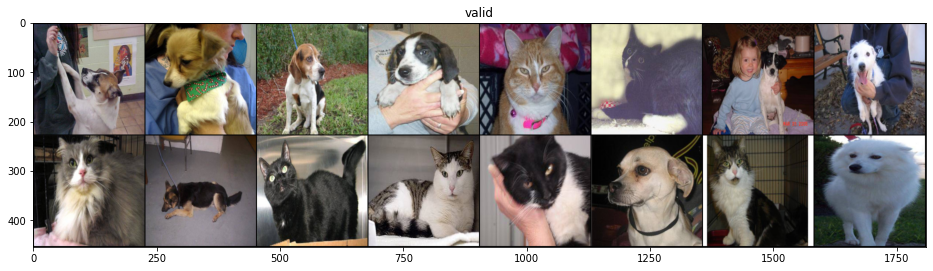

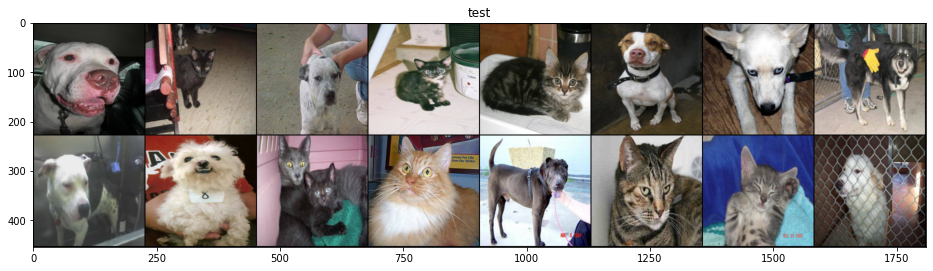

In [76]:
images, _ = iter(dataloader.train_iterator).next()
plot_images(images, 'train')

images, _ = iter(dataloader.valid_iterator).next()
plot_images(images, 'valid')

images, _ = iter(dataloader.test_iterator).next()
plot_images(images, 'test')

In [77]:
class Classifier(ResNet50):
    def __init__(self):
        super(Classifier, self).__init__()
        
        self.fc = nn.Sequential(
            nn.Linear(2048, 1, bias=True),
            nn.Sigmoid()
        )


In [87]:
net = Classifier()

trainer = Trainer(
    net,
    dataloader=dataloader,
    lr=0.0001,
    device=device,
    root=''
)

In [88]:
trainer.train_data(num_epochs=100)

Epoch: 0


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.7004 Acc : 56.3606 Time: 18.1987
Valid - Loss : 0.6759 Acc : 62.0192 Time: 1.1992

Epoch: 1


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6645 Acc : 60.9513 Time: 18.8823
Valid - Loss : 0.6858 Acc : 57.6923 Time: 1.1839

Epoch: 2


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6559 Acc : 62.2788 Time: 18.9882
Valid - Loss : 0.6560 Acc : 62.9808 Time: 1.1713

Epoch: 3


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6333 Acc : 63.4956 Time: 19.5919
Valid - Loss : 0.6401 Acc : 61.5385 Time: 1.7830

Epoch: 4


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6353 Acc : 64.7124 Time: 18.7759
Valid - Loss : 0.6632 Acc : 63.9423 Time: 1.2409

Epoch: 5


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6162 Acc : 66.3164 Time: 18.7584
Valid - Loss : 0.6648 Acc : 59.6154 Time: 1.1904

Epoch: 6


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6276 Acc : 66.0951 Time: 19.3966
Valid - Loss : 0.6673 Acc : 63.4615 Time: 1.2948

Epoch: 7


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6151 Acc : 66.4823 Time: 19.0963
Valid - Loss : 0.6583 Acc : 60.0962 Time: 1.1959

Epoch: 8


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.6031 Acc : 66.4823 Time: 18.7718
Valid - Loss : 0.6349 Acc : 67.7885 Time: 1.1937

Epoch: 9


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5867 Acc : 69.0265 Time: 20.0203
Valid - Loss : 0.7056 Acc : 59.6154 Time: 1.6184

Epoch: 10


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5758 Acc : 69.1372 Time: 21.0505
Valid - Loss : 0.6622 Acc : 64.4231 Time: 1.5859

Epoch: 11


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5775 Acc : 69.9668 Time: 20.9683
Valid - Loss : 0.6696 Acc : 62.0192 Time: 1.1943

Epoch: 12


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5670 Acc : 70.3540 Time: 19.0294
Valid - Loss : 0.6541 Acc : 63.4615 Time: 2.0855

Epoch: 13


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5577 Acc : 72.4004 Time: 22.4532
Valid - Loss : 0.5927 Acc : 71.1538 Time: 1.1977

Epoch: 14


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5451 Acc : 72.2345 Time: 20.3211
Valid - Loss : 0.6035 Acc : 71.1538 Time: 1.2170

Epoch: 15


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5413 Acc : 72.1792 Time: 19.6705
Valid - Loss : 0.6482 Acc : 66.3462 Time: 1.2190

Epoch: 16


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5143 Acc : 74.1150 Time: 19.3115
Valid - Loss : 0.6402 Acc : 64.9038 Time: 1.2028

Epoch: 17


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4997 Acc : 76.1615 Time: 18.7475
Valid - Loss : 0.5941 Acc : 73.0769 Time: 1.1884

Epoch: 18


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4839 Acc : 76.7146 Time: 19.3263
Valid - Loss : 0.6872 Acc : 69.7115 Time: 1.2478

Epoch: 19


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4814 Acc : 77.3783 Time: 18.7210
Valid - Loss : 0.6599 Acc : 67.7885 Time: 1.2192

Epoch: 20


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.5114 Acc : 75.3319 Time: 19.0965
Valid - Loss : 0.5952 Acc : 68.7500 Time: 1.1862

Epoch: 21


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4621 Acc : 78.4292 Time: 19.4497
Valid - Loss : 0.5938 Acc : 74.5192 Time: 1.2043

Epoch: 22


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4367 Acc : 78.9823 Time: 18.7788
Valid - Loss : 0.6383 Acc : 70.1923 Time: 1.2149

Epoch: 23


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4459 Acc : 78.1527 Time: 19.0772
Valid - Loss : 0.6006 Acc : 69.2308 Time: 1.8503

Epoch: 24


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4182 Acc : 80.0885 Time: 19.3069
Valid - Loss : 0.5581 Acc : 75.4808 Time: 1.2233

Epoch: 25


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4307 Acc : 80.2544 Time: 19.3848
Valid - Loss : 0.5300 Acc : 73.5577 Time: 1.2103

Epoch: 26


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4098 Acc : 80.9181 Time: 19.3981
Valid - Loss : 0.5049 Acc : 76.4423 Time: 1.2196

Epoch: 27


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4010 Acc : 81.0288 Time: 18.7844
Valid - Loss : 0.5906 Acc : 73.0769 Time: 1.2475

Epoch: 28


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3906 Acc : 80.9735 Time: 19.0630
Valid - Loss : 0.6204 Acc : 70.6731 Time: 1.7672

Epoch: 29


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.4120 Acc : 81.1947 Time: 18.7446
Valid - Loss : 0.5741 Acc : 70.1923 Time: 1.1829

Epoch: 30


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3671 Acc : 83.2965 Time: 18.7821
Valid - Loss : 0.5581 Acc : 73.5577 Time: 1.2110

Epoch: 31


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3646 Acc : 82.7987 Time: 19.2744
Valid - Loss : 0.5803 Acc : 74.5192 Time: 1.2161

Epoch: 32


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3566 Acc : 84.0708 Time: 18.7858
Valid - Loss : 0.5046 Acc : 75.9615 Time: 1.2160

Epoch: 33


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3561 Acc : 84.1261 Time: 18.7995
Valid - Loss : 0.5168 Acc : 74.5192 Time: 1.2290

Epoch: 34


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3570 Acc : 83.5177 Time: 19.4180
Valid - Loss : 0.5652 Acc : 76.9231 Time: 1.2128

Epoch: 35


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3190 Acc : 86.0619 Time: 19.4490
Valid - Loss : 0.6278 Acc : 71.6346 Time: 1.2283

Epoch: 36


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3412 Acc : 84.2920 Time: 20.1238
Valid - Loss : 0.5667 Acc : 72.5962 Time: 1.1994

Epoch: 37


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3230 Acc : 85.5642 Time: 18.7744
Valid - Loss : 0.5468 Acc : 73.0769 Time: 1.1945

Epoch: 38


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.3020 Acc : 87.4447 Time: 18.9502
Valid - Loss : 0.6153 Acc : 72.1154 Time: 1.2416

Epoch: 39


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2874 Acc : 87.8872 Time: 20.6950
Valid - Loss : 0.5017 Acc : 75.0000 Time: 1.2392

Epoch: 40


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2887 Acc : 87.8319 Time: 19.4770
Valid - Loss : 0.6179 Acc : 74.0385 Time: 1.2149

Epoch: 41


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2851 Acc : 88.3296 Time: 19.5457
Valid - Loss : 0.5305 Acc : 76.4423 Time: 1.1915

Epoch: 42


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2772 Acc : 87.1128 Time: 18.7938
Valid - Loss : 0.5951 Acc : 72.5962 Time: 1.2484

Epoch: 43


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2715 Acc : 88.2743 Time: 18.8713
Valid - Loss : 0.5409 Acc : 75.0000 Time: 1.2181

Epoch: 44


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2400 Acc : 89.8783 Time: 19.3511
Valid - Loss : 0.5933 Acc : 75.0000 Time: 1.2340

Epoch: 45


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2341 Acc : 90.5420 Time: 18.8350
Valid - Loss : 0.5680 Acc : 76.4423 Time: 1.2196

Epoch: 46


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2323 Acc : 90.4314 Time: 20.6799
Valid - Loss : 0.6842 Acc : 74.0385 Time: 2.0233

Epoch: 47


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2323 Acc : 90.3761 Time: 19.1274
Valid - Loss : 0.6779 Acc : 69.7115 Time: 1.2075

Epoch: 48


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2264 Acc : 90.2655 Time: 18.8428
Valid - Loss : 0.5949 Acc : 74.5192 Time: 1.2021

Epoch: 49


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2016 Acc : 91.7588 Time: 19.3681
Valid - Loss : 0.6043 Acc : 76.4423 Time: 1.1786

Epoch: 50


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2131 Acc : 91.3717 Time: 18.8241
Valid - Loss : 0.5947 Acc : 77.8846 Time: 1.1891

Epoch: 51


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1986 Acc : 91.9801 Time: 19.4101
Valid - Loss : 0.5592 Acc : 82.2115 Time: 1.1880

Epoch: 52


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.2012 Acc : 92.3673 Time: 18.8920
Valid - Loss : 0.5975 Acc : 74.0385 Time: 1.2031

Epoch: 53


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1911 Acc : 92.2013 Time: 18.8282
Valid - Loss : 0.6814 Acc : 74.5192 Time: 1.2362

Epoch: 54


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1828 Acc : 92.3673 Time: 19.4929
Valid - Loss : 0.6686 Acc : 76.9231 Time: 1.2185

Epoch: 55


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1904 Acc : 91.3164 Time: 18.9485
Valid - Loss : 0.6139 Acc : 78.8462 Time: 1.2479

Epoch: 56


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1930 Acc : 92.0354 Time: 20.1110
Valid - Loss : 0.5631 Acc : 79.3269 Time: 1.1955

Epoch: 57


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1575 Acc : 93.9159 Time: 19.3912
Valid - Loss : 0.7802 Acc : 74.0385 Time: 1.2131

Epoch: 58


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1716 Acc : 93.6394 Time: 18.7670
Valid - Loss : 0.5013 Acc : 82.2115 Time: 1.1937

Epoch: 59


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1536 Acc : 94.1925 Time: 19.3652
Valid - Loss : 0.5239 Acc : 81.7308 Time: 1.2000

Epoch: 60


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1356 Acc : 94.6903 Time: 18.8852
Valid - Loss : 0.7144 Acc : 76.4423 Time: 1.2064

Epoch: 61


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1635 Acc : 93.9159 Time: 19.4983
Valid - Loss : 0.6888 Acc : 75.9615 Time: 1.2216

Epoch: 62


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1253 Acc : 95.7412 Time: 18.8180
Valid - Loss : 0.6943 Acc : 80.2885 Time: 1.1964

Epoch: 63


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1284 Acc : 95.2987 Time: 18.9146
Valid - Loss : 0.6454 Acc : 77.4038 Time: 1.2103

Epoch: 64


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1622 Acc : 93.3075 Time: 19.4162
Valid - Loss : 0.5697 Acc : 80.7692 Time: 1.2333

Epoch: 65


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1245 Acc : 95.6858 Time: 18.8764
Valid - Loss : 0.5218 Acc : 81.2500 Time: 1.2116

Epoch: 66


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1376 Acc : 94.6903 Time: 19.4273
Valid - Loss : 0.7396 Acc : 78.8462 Time: 1.1839

Epoch: 67


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1653 Acc : 93.4181 Time: 19.7446
Valid - Loss : 0.6629 Acc : 78.3654 Time: 1.9251

Epoch: 68


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1275 Acc : 95.6305 Time: 18.8175
Valid - Loss : 0.5718 Acc : 80.7692 Time: 1.1908

Epoch: 69


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1454 Acc : 94.3584 Time: 19.4665
Valid - Loss : 0.5438 Acc : 79.8077 Time: 1.2097

Epoch: 70


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1076 Acc : 95.7965 Time: 18.9025
Valid - Loss : 0.6444 Acc : 77.4038 Time: 1.1857

Epoch: 71


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1006 Acc : 96.5708 Time: 19.5125
Valid - Loss : 0.5381 Acc : 82.6923 Time: 1.1984

Epoch: 72


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1336 Acc : 94.8562 Time: 18.8709
Valid - Loss : 0.6298 Acc : 80.2885 Time: 1.2123

Epoch: 73


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1097 Acc : 95.8518 Time: 19.0011
Valid - Loss : 0.6250 Acc : 81.7308 Time: 1.2208

Epoch: 74


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1168 Acc : 95.2987 Time: 19.5437
Valid - Loss : 0.7128 Acc : 78.3654 Time: 1.2185

Epoch: 75


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1007 Acc : 96.0177 Time: 18.9346
Valid - Loss : 0.6434 Acc : 79.8077 Time: 1.2062

Epoch: 76


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1040 Acc : 96.4049 Time: 19.4934
Valid - Loss : 0.6019 Acc : 79.8077 Time: 1.2234

Epoch: 77


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0917 Acc : 96.1283 Time: 19.5317
Valid - Loss : 0.7324 Acc : 81.7308 Time: 1.2131

Epoch: 78


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1005 Acc : 95.8518 Time: 19.5362
Valid - Loss : 0.6970 Acc : 76.9231 Time: 1.2193

Epoch: 79


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0874 Acc : 96.8473 Time: 19.3150
Valid - Loss : 0.8009 Acc : 76.9231 Time: 1.4314

Epoch: 80


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0802 Acc : 96.4049 Time: 18.8787
Valid - Loss : 0.9443 Acc : 76.4423 Time: 1.2230

Epoch: 81


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1497 Acc : 93.8606 Time: 18.9032
Valid - Loss : 0.7501 Acc : 75.9615 Time: 1.2064

Epoch: 82


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0850 Acc : 96.6814 Time: 19.5763
Valid - Loss : 0.6184 Acc : 81.2500 Time: 1.2099

Epoch: 83


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0970 Acc : 96.3496 Time: 18.9147
Valid - Loss : 0.5937 Acc : 81.7308 Time: 1.2235

Epoch: 84


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0984 Acc : 96.4049 Time: 19.3647
Valid - Loss : 0.7263 Acc : 76.4423 Time: 1.2225

Epoch: 85


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0783 Acc : 97.1792 Time: 18.9344
Valid - Loss : 0.6896 Acc : 79.8077 Time: 1.2302

Epoch: 86


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0839 Acc : 97.0686 Time: 19.0075
Valid - Loss : 0.6455 Acc : 82.2115 Time: 1.2336

Epoch: 87


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0834 Acc : 96.7367 Time: 19.9843
Valid - Loss : 0.7238 Acc : 81.2500 Time: 1.1865

Epoch: 88


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.1073 Acc : 96.4049 Time: 19.5413
Valid - Loss : 0.6017 Acc : 81.7308 Time: 1.1720

Epoch: 89


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0941 Acc : 96.5155 Time: 19.5055
Valid - Loss : 0.7787 Acc : 75.9615 Time: 1.2440

Epoch: 90


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0761 Acc : 97.5111 Time: 18.9821
Valid - Loss : 0.6349 Acc : 79.8077 Time: 1.2132

Epoch: 91


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0595 Acc : 98.1195 Time: 18.9612
Valid - Loss : 0.6157 Acc : 81.7308 Time: 1.2294

Epoch: 92


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0529 Acc : 98.0642 Time: 19.4708
Valid - Loss : 0.6743 Acc : 81.7308 Time: 1.2530

Epoch: 93


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0817 Acc : 97.2345 Time: 18.9597
Valid - Loss : 0.7829 Acc : 77.4038 Time: 1.2375

Epoch: 94


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0871 Acc : 96.4049 Time: 19.4358
Valid - Loss : 0.5565 Acc : 79.3269 Time: 1.2044

Epoch: 95


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0944 Acc : 96.5155 Time: 18.9622
Valid - Loss : 0.6530 Acc : 80.7692 Time: 1.1910

Epoch: 96


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0564 Acc : 97.8429 Time: 18.9432
Valid - Loss : 0.5223 Acc : 84.6154 Time: 1.2194

Epoch: 97


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0515 Acc : 97.9535 Time: 19.6508
Valid - Loss : 0.7159 Acc : 78.8462 Time: 2.0717

Epoch: 98


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0688 Acc : 97.7323 Time: 19.6594
Valid - Loss : 0.7002 Acc : 79.8077 Time: 1.2274

Epoch: 99


  0%|          | 0/113 [00:00<?, ?it/s]

Train - Loss : 0.0674 Acc : 97.5664 Time: 19.5508
Valid - Loss : 0.6854 Acc : 80.7692 Time: 1.2460

Test  - Loss : 0.6436 Acc : 80.9524 Time: 5.0749


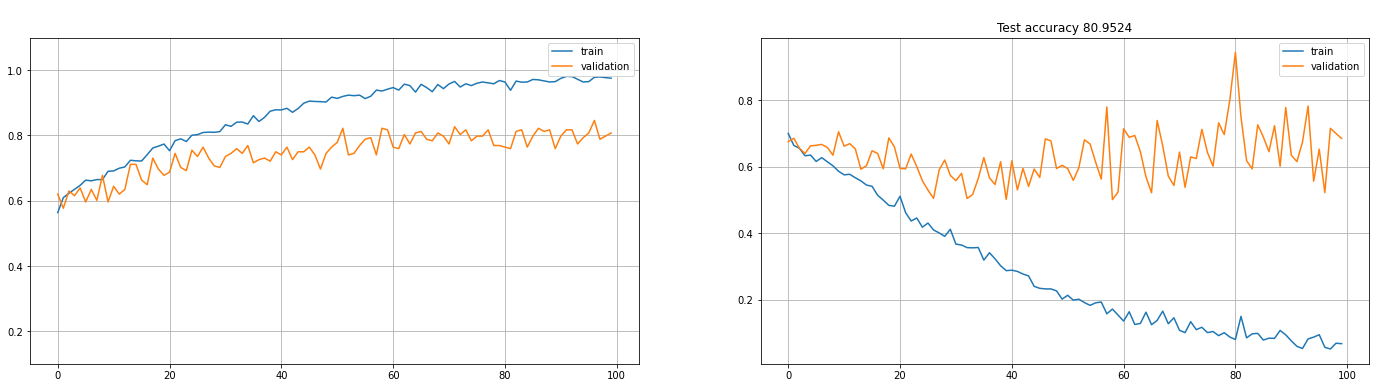

In [89]:
title = 'Resnet50 - basic augmentations'
trainer.plot_history()

In [104]:
def plot_history(self, title="", saving_path=''):
    """_summary_"""
    plt.figure(figsize=(24, 6))
    plt.subplot(1, 2, 1)
    plt.plot(self.history["epoch"], self.history["train_accuracy"], label="train")
    plt.plot(
        self.history["epoch"], self.history["valid_accuracy"], label="validation"
    )
    plt.ylim(0.5, 1.1)
    plt.grid()
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(self.history["epoch"], self.history["train_loss"], label="train")
    plt.plot(self.history["epoch"], self.history["valid_loss"], label="validation")
    plt.grid()
    plt.legend()
    plt.title('Loss')

    plt.suptitle(f"{title}\nTest accuracy {self.test_accuracy:.4f}")

    if saving_path:
        plt.savefig(os.path.join(saving_path, f"figures/{title}.png"))
    plt.show()

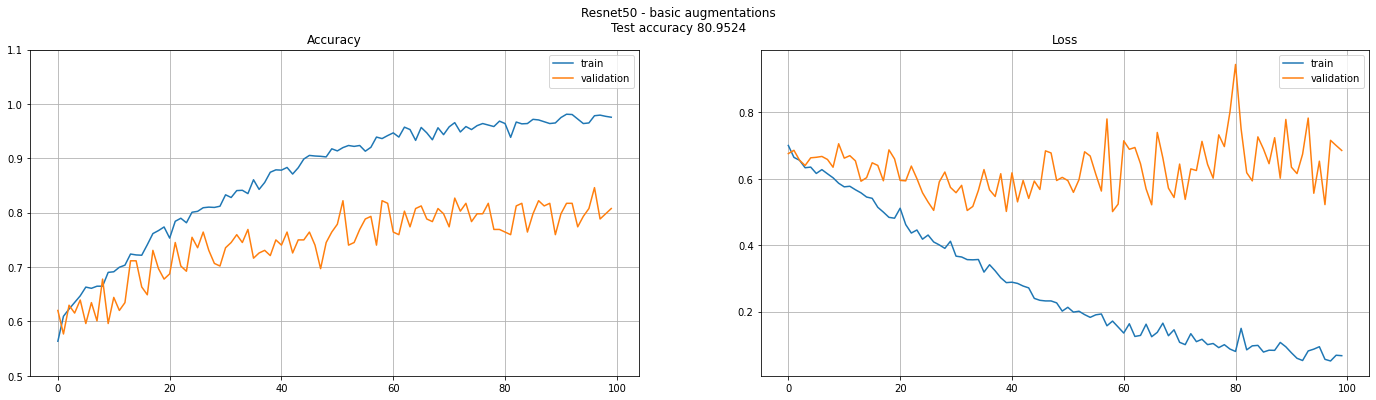

In [105]:
plot_history(trainer,title, PATH_REPO_DRIVE)